In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', lambda x: '%.0f' % x)

### Analysis of genres

In [2]:
df_ititlebas = pd.read_csv('data/imdb.title.basics.csv')

In [3]:
df_ititlebas.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy"


In [4]:
df_bom_profit = pd.read_csv('data/boxoffice_profit.csv')

In [5]:
df_bom_profit.head(5)

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,2351345279,True
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,635063875,True
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-200237650,False
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,1072413963,True
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,999721747,True


In [9]:
df_ititlebas.drop(columns=['runtime_minutes', 'tconst'], inplace=True)

In [10]:
df_ititlebas.head()

,primary_title,original_title,start_year,genres
0,Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
2,The Other Side of the Wind,The Other Side of the Wind,2018,Drama
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama"
4,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"


In [12]:
filt = df_ititlebas['genres'].str.contains('Drama', na=False)

In [13]:
df_ititlebas.loc[filt]

,primary_title,original_title,start_year,genres
0,Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
2,The Other Side of the Wind,The Other Side of the Wind,2018,Drama
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama"
4,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"
...,...,...,...,...
146124,The Holden Family Plan,The Holden Family Plan,2019,"Drama,Family"
146132,The Last White Witch,The Last White Witch,2019,"Comedy,Drama,Fantasy"
146135,The Rehearsal,O Ensaio,2019,Drama
146137,Safeguard,Safeguard,2019,"Drama,Thriller"


In [29]:
df_ititlebas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 4 columns):
primary_title     146144 non-null object
original_title    146123 non-null object
start_year        146144 non-null int64
genres            140736 non-null object
dtypes: int64(1), object(3)
memory usage: 4.5+ MB


In [19]:
df_bom_profit.set_index('movie', inplace=True)

In [20]:
df_bom_profit.head()

,Unnamed: 0,id,release_date,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit
movie,,,,,,,,,
Avatar,0,1,"Dec 18, 2009",425000000,760507625,2776345279,2015837654,2351345279,True
Pirates of the Caribbean: On Stranger Tides,1,2,"May 20, 2011",410600000,241063875,1045663875,804600000,635063875,True
Dark Phoenix,2,3,"Jun 7, 2019",350000000,42762350,149762350,107000000,-200237650,False
Avengers: Age of Ultron,3,4,"May 1, 2015",330600000,459005868,1403013963,944008095,1072413963,True
Star Wars Ep. VIII: The Last Jedi,4,5,"Dec 15, 2017",317000000,620181382,1316721747,696540365,999721747,True


In [31]:
merge_inner = pd.merge(left=df_bom_profit,right=df_ititlebas, left_on='movie', right_on='primary_title')

In [33]:
merge_inner.head()

,Unnamed: 0,id,release_date,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit,primary_title,original_title,start_year,genres
0,0,1,"Dec 18, 2009",425000000,760507625,2776345279,2015837654,2351345279,True,Avatar,Abatâ,2011,Horror
1,1,2,"May 20, 2011",410600000,241063875,1045663875,804600000,635063875,True,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy"
2,2,3,"Jun 7, 2019",350000000,42762350,149762350,107000000,-200237650,False,Dark Phoenix,Dark Phoenix,2019,"Action,Adventure,Sci-Fi"
3,3,4,"May 1, 2015",330600000,459005868,1403013963,944008095,1072413963,True,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi"
4,6,7,"Apr 27, 2018",300000000,678815482,2048134200,1369318718,1748134200,True,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi"


In [42]:
merge_inner.drop(columns='start_year', inplace=True)

In [46]:
merge_inner.drop(columns='release_date', inplace=True)

In [47]:
merge_inner.drop(columns='Unnamed: 0', inplace=True)

In [48]:
merge_inner.drop(columns='original_title', inplace=True)

In [49]:
merge_inner.head()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit,primary_title,genres
0,1,425000000,760507625,2776345279,2015837654,2351345279,True,Avatar,Horror
1,2,410600000,241063875,1045663875,804600000,635063875,True,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy"
2,3,350000000,42762350,149762350,107000000,-200237650,False,Dark Phoenix,"Action,Adventure,Sci-Fi"
3,4,330600000,459005868,1403013963,944008095,1072413963,True,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi"
4,7,300000000,678815482,2048134200,1369318718,1748134200,True,Avengers: Infinity War,"Action,Adventure,Sci-Fi"


In [50]:
profit_counts = []

In [57]:
filt = (merge_inner['genres'].str.contains('Drama', na=False)) & (merge_inner['profit'] == True)

In [64]:
profit_counts.append(len(merge_inner.loc[filt].index))

In [66]:
filt = (merge_inner['genres'].str.contains('Action', na=False)) & (merge_inner['profit'] == True)

In [67]:
profit_counts.append(len(merge_inner.loc[filt].index))

In [68]:
filt = (merge_inner['genres'].str.contains('Documentary', na=False)) & (merge_inner['profit'] == True)

In [69]:
profit_counts.append(len(merge_inner.loc[filt].index))

In [70]:
filt = (merge_inner['genres'].str.contains('Adventure', na=False)) & (merge_inner['profit'] == True)

In [71]:
profit_counts.append(len(merge_inner.loc[filt].index))

In [72]:
filt = (merge_inner['genres'].str.contains('Sci-Fi', na=False)) & (merge_inner['profit'] == True)

In [73]:
profit_counts.append(len(merge_inner.loc[filt].index))

In [74]:
filt = (merge_inner['genres'].str.contains('Comedy', na=False)) & (merge_inner['profit'] == True)

In [75]:
profit_counts.append(len(merge_inner.loc[filt].index))

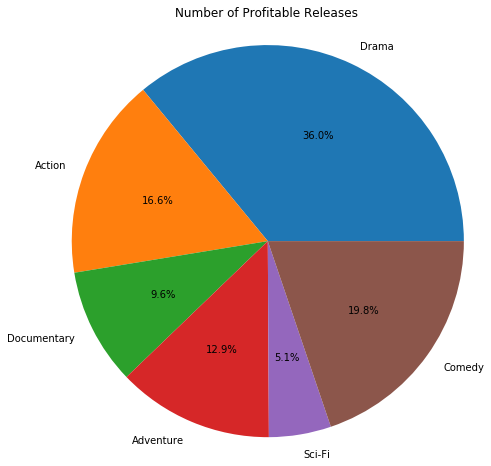

In [80]:
index_counts = ['Drama', 'Action', 'Documentary', 'Adventure', 'Sci-Fi', 'Comedy']

plt.figure(figsize=(10,8))
plt.pie(profit_counts, labels=index_counts, autopct='%1.1f%%', shadow=False)

plt.axis('scaled')
plt.title('Number of Profitable Releases')

plt.show();

In [81]:
loss_counts = []

In [82]:
filt = (merge_inner['genres'].str.contains('Drama', na=False)) & (merge_inner['profit'] == False)

In [84]:
loss_counts.append(len(merge_inner.loc[filt].index))

In [85]:
filt = (merge_inner['genres'].str.contains('Action', na=False)) & (merge_inner['profit'] == False)

In [86]:
loss_counts.append(len(merge_inner.loc[filt].index))

In [87]:
filt = (merge_inner['genres'].str.contains('Documentary', na=False)) & (merge_inner['profit'] == False)

In [88]:
loss_counts.append(len(merge_inner.loc[filt].index))

In [89]:
filt = (merge_inner['genres'].str.contains('Adventure', na=False)) & (merge_inner['profit'] == False)

In [90]:
loss_counts.append(len(merge_inner.loc[filt].index))

In [91]:
filt = (merge_inner['genres'].str.contains('Sci-Fi', na=False)) & (merge_inner['profit'] == False)

In [92]:
loss_counts.append(len(merge_inner.loc[filt].index))

In [93]:
filt = (merge_inner['genres'].str.contains('Comedy', na=False)) & (merge_inner['profit'] == False)

In [94]:
loss_counts.append(len(merge_inner.loc[filt].index))

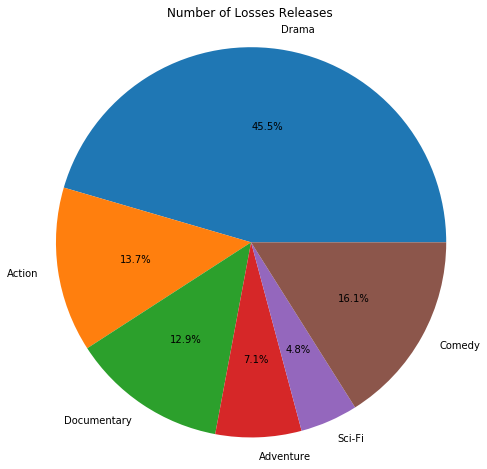

In [96]:
index_counts = ['Drama', 'Action', 'Documentary', 'Adventure', 'Sci-Fi', 'Comedy']

plt.figure(figsize=(10,8))
plt.pie(loss_counts, labels=index_counts, autopct='%1.1f%%', shadow=False)
plt.axis('scaled')
plt.title('Number of Losses Releases')
plt.show();